In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Helper Functions for loading in Data:

In [2]:
def load_NuclearGenData(filepath, countries):
    df=pd.read_excel(os.path.join(filepath, "bp-stats-review-2022-all-data.xlsx"), sheet_name="Nuclear Generation - TWh", header=2)
    df=df.rename(columns={"Terawatt-hours": "country"})
    
    df=df.set_index("country")
    df=df.loc[countries]
    df=df.loc[:, 1965:2021]
    df=df.stack()
    df=df.to_frame()
    df=df.rename(columns={df.columns[0]: 'Nuclear Generation - TWh'})
    df.index.set_names(["country", "Year"], inplace=True)
    df=df.fillna(0.0)
    
    return df

In [3]:
def load_gdpData(filepath, countries):
    print(filepath)
    df=pd.read_csv(os.path.join(filepath, "GDP.csv"), sep=",", header=2)
    df=df.rename(columns={"Country Name": "country"})
    df=df.set_index("country")

    df=df.iloc[:,8:-1]
    
    df=df.rename(index={"United States": "US", "Venezuela, RB": "Venezuela", "Czechia": "Czech Republic", "Slovak Republic": "Slovakia", 
            "Turkiye": "Turkey", "Iran, Islamic Rep.": "Iran", "Egypt, Arab Rep.": "Egypt", "Korea, Rep.": "South Korea"})
    cntries=[cntry for cntry in countries if cntry in df.index]
    #print([cntry for cntry in countries if cntry in df.index])
    #print([cntry for cntry in countries if cntry not in df.index])
    df=df.loc[cntries]
    df=df.rename(columns={cols:int(cols) for cols in df.columns})
    df=df.stack()
    df=df.to_frame()
    df=df.rename(columns={df.columns[0]: "GDP"})
    df.index.set_names(["country", "Year"], inplace=True)
    #print(df)
    return df

In [4]:
def load_popRedData(filepath, countries):
    df=pd.read_csv(os.path.join(filepath, "PopReduced.csv"), sep=",", header=0)
    df=df.set_index(["country", "Year"])
    df=df.rename(index={"United States": "US", 'United States of America': "US", "Venezuela, RB": "Venezuela",  'Venezuela (Bolivarian Republic of)': "Venezuela", "Czechia": "Czech Republic", "Slovak Republic": "Slovakia", 
            "Turkiye": "Turkey", 'Türkiye': "Turkey", "Iran, Islamic Rep.": "Iran", 'Iran (Islamic Republic of)': "Iran", "Egypt, Arab Rep.": "Egypt", 
            "Korea, Rep.": "South Korea", 'Republic of Korea': "South Korea", 'Viet Nam': "Vietnam"})
    df=df.rename(columns={"Total Population, as of 1 January (thousands)": "Population", "Life Expectancy at Birth, both sexes (years)": "Life Expectancy"})
    cntries=list(set(cntry[0] for cntry in df.index if cntry[0] in countries))
    df["Life Expectancy"]=pd.to_numeric(df["Life Expectancy"], errors="coerce")
    df=df.drop(columns=["ISO3 Alpha-code"])
    
    df=df.loc[cntries]
    return df

In [5]:
def load_CoalCons(filepath, countries):
    df=pd.read_excel(os.path.join(filepath, "bp-stats-review-2022-all-data.xlsx"), sheet_name="Coal Consumption - EJ", header=2)
    df=df.rename(columns={"Exajoules": "country"})
    
    df=df.set_index("country")
    df=df.loc[countries]
    df=df.loc[:, 1965:2021]
    df=df.stack()
    df=df.to_frame()
    df=df.rename(columns={df.columns[0]: "Coal consumption - EJ"})
    df.index.set_names(["country", "Year"], inplace=True)
    df=df.fillna(0.0)
    
    return df

Selection of countries and total regions for plotting the evolution of Nuclear Energy data

In [6]:
bp_ds_countries=[
    "Canada", "Mexico", "US", "Total North America", 
    "Argentina", "Brazil", "Chile", "Colombia", "Ecuador", "Peru", "Venezuela", "Total S. & Cent. America",
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", 
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Iceland", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Netherlands", 
    "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Slovakia", 
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom",
    "Other Europe", "Total Europe",
    "Azerbaijan", "Belarus", "Kazakhstan", "Russian Federation", "Turkmenistan", "USSR", 
    "Uzbekistan", "Other CIS", "Total CIS",
    "Iran", "Iraq", "Israel", "Kuwait", "Oman", "Qatar", "Saudi Arabia", "United Arab Emirates",
    "Other Middle East", "Total Middle East", 
    "Algeria", "Egypt", "Morocco", "South Africa", "Eastern Africa", "Middle Africa", "Western Africa",
    "Other Northern Africa", "Other Southern Africa", "Total Africa", 
    "Australia", "Bangladesh", "China", "China Hong Kong SAR", "India", "Indonesia", "Japan", "Malaysia", 
    "New Zealand", "Pakistan", "Philippines", "Singapore", "South Korea", "Sri Lanka", "Taiwan", "Thailand", 
    "Vietnam", "Total Asia Pacific"

]

countriesNA=["Canada", "Mexico", "US", "Total North America"]
countriesEU=["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", 
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Iceland", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Netherlands", 
    "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Slovakia", 
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom",
    "Other Europe", "Total Europe"]
countriesCIS=["Azerbaijan", "Belarus", "Kazakhstan", "Russian Federation", "Turkmenistan", "USSR", 
    "Uzbekistan", "Other CIS", "Total CIS"]
countriesME=["Iran", "Iraq", "Israel", "Kuwait", "Oman", "Qatar", "Saudi Arabia", "United Arab Emirates",
    "Other Middle East", "Total Middle East"]
countriesAf=["Algeria", "Egypt", "Morocco", "South Africa", "Eastern Africa", "Middle Africa", "Western Africa",
    "Other Northern Africa", "Other Southern Africa", "Total Africa"]
countriesAP=["Australia", "Bangladesh", "China", "China Hong Kong SAR", "India", "Indonesia", "Japan", "Malaysia", 
    "New Zealand", "Pakistan", "Philippines", "Singapore", "South Korea", "Sri Lanka", "Taiwan", "Thailand", 
    "Vietnam", "Total Asia Pacific"]

PATH TO DATA may need modifying when not used from kaggle

In [13]:
#pathToData="/kaggle/input/dopp-nuclearpower/"
pathToData=""
df_Nuclear=load_NuclearGenData(pathToData, bp_ds_countries)
df_GDP=load_gdpData(pathToData, bp_ds_countries)
df_Pop=load_popRedData(pathToData, bp_ds_countries)
df_coal=load_CoalCons(pathToData, bp_ds_countries)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/dopp-nuclearpower/bp-stats-review-2022-all-data.xlsx'

Text(0, 0.5, 'TWh')

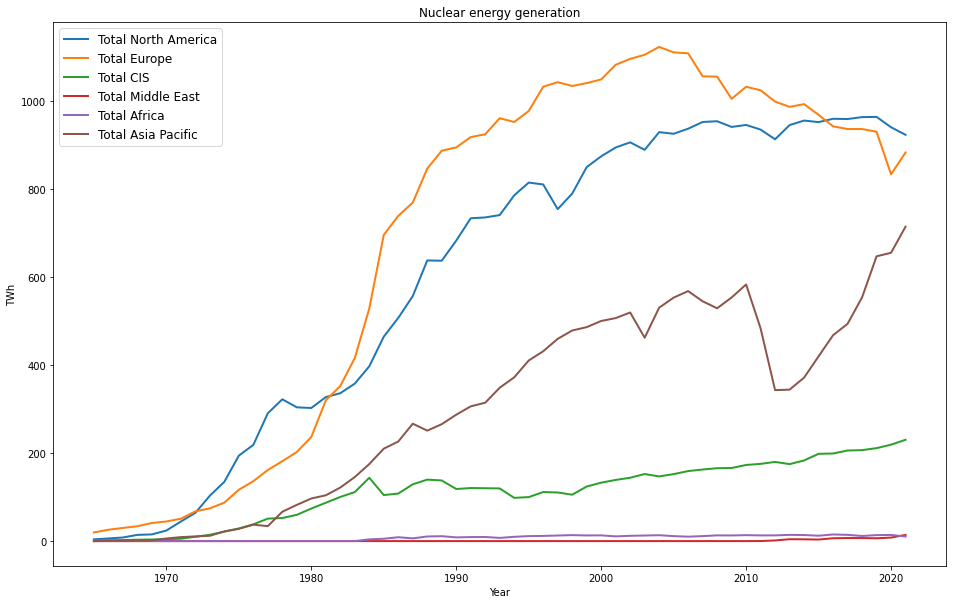

In [23]:
fig, axF = plt.subplots()
for cntry in ["Total North America", "Total Europe", "Total CIS", "Total Middle East", "Total Africa", "Total Asia Pacific"]:
    df_Nuclear.loc[cntry].plot(ax=axF, linewidth=2, figsize=(16,10), label=cntry)
#ax.vlines(2011, -50, 1250, color="grey", linestyle="--", label="Fukushima")
#ax.vlines(1986, -50, 1250, color="grey", linestyle="--", label="Chernobyl")
axF.legend([axF.get_lines()[0], axF.get_lines()[1], axF.get_lines()[2], axF.get_lines()[3], axF.get_lines()[4], axF.get_lines()[5]], 
        ["Total North America", "Total Europe", "Total CIS", "Total Middle East", "Total Africa", "Total Asia Pacific"], fontsize=12)
axF.set_title("Nuclear energy generation")
axF.set_xlabel("Year")
axF.set_ylabel("TWh")

Selecting countries from intersecting the datasets and combining them into one dataframe (except coal)

In [24]:
cntries=list(set(cnt[0] for cnt in df_GDP.index).intersection(set(cnt[0] for cnt in df_Nuclear.index)))
df=pd.concat([df_Pop, df_GDP, df_Nuclear.loc[cntries]], axis=1)

NaNs handling: dropping missing data rows, data before 1965 (start of our nuclear power dataset and start of the relevant years for nuclear energy production), also calculating the NuclearPower per capita

Warnings here were ignored, as the alternative suggested way also produced the same warnings

In [25]:
df2=df.dropna()
#print(sorted(list(set(cntry[0] for cntry in df2.index))))
df2["GDP per capita"]=df2["GDP"]/(1000*df2["Population"])
df2["NuclearPower per capita kWh/Person"]=1000000000*df2["Nuclear Generation - TWh"]/(1000*df2["Population"])
df2["GDPpc diff"]=df2["GDP per capita"].diff().fillna(0.0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Lets take a look at nuclear power and coal consumption in Germany:

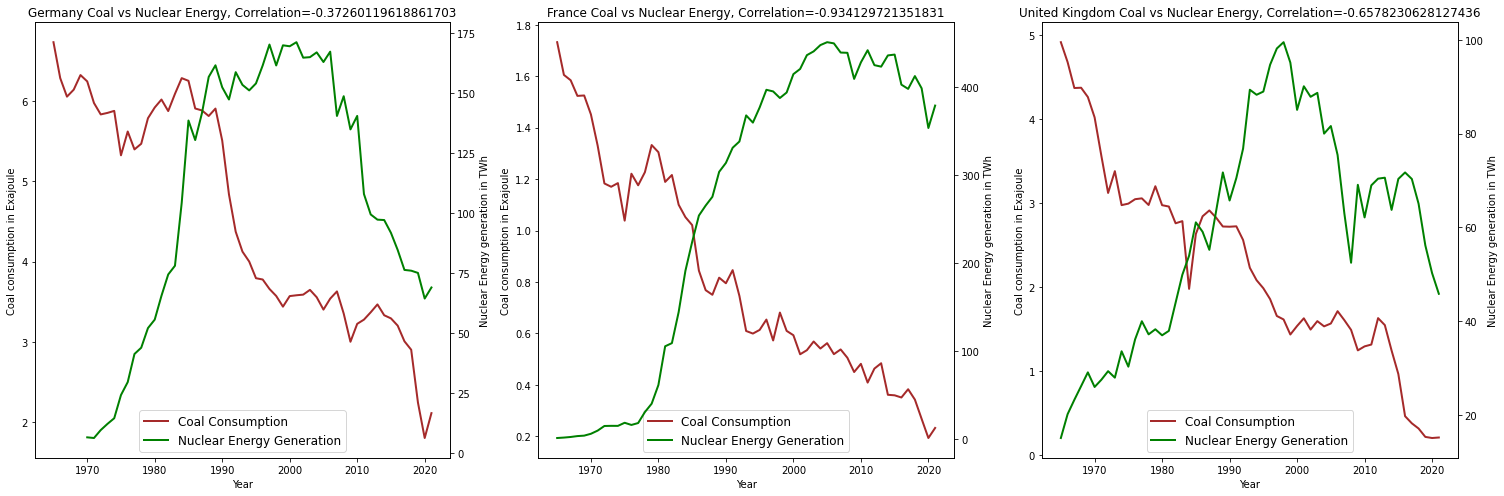

In [26]:
fig, axF2 = plt.subplots(1, 3, figsize=(21,7))
for i, cntry in enumerate(["Germany", "France", "United Kingdom"]):
    axF2[i].plot(df_coal.loc[cntry]["Coal consumption - EJ"], linewidth=2, color="brown", label="Coal Consumption")
    axF3=axF2[i].twinx()
    axF3.plot(df2.loc[cntry]["Nuclear Generation - TWh"], linewidth=2, color="green", label="Nuclear Energy Generation")
    axF2[i].set_title(cntry+ " Coal vs Nuclear Energy, Correlation="+str(df_coal.loc[cntry].corrwith(df2.loc[cntry]["Nuclear Generation - TWh"])["Coal consumption - EJ"]))
    axF2[i].set_xlabel("Year")
    axF2[i].set_ylabel("Coal consumption in Exajoule")
    axF3.set_ylabel("Nuclear Energy generation in TWh")
    axF2[i].legend([axF2[i].get_lines()[0], axF3.get_lines()[0]], ["Coal Consumption", "Nuclear Energy Generation"], fontsize=12, loc="lower center")
    str(df_coal.loc[cntry].corrwith(df2.loc[cntry]["Nuclear Generation - TWh"])["Coal consumption - EJ"])
    plt.tight_layout()

What is the correlation between coal and nuclear?

In [28]:
for i, cntry in enumerate(cntries):
    if df2.loc[cntry]["Nuclear Generation - TWh"].mean()>0:
        print(cntry+" " + str(df_coal.loc[cntry].corrwith(df2.loc[cntry]["Nuclear Generation - TWh"])["Coal consumption - EJ"]))

India 0.9797590508074631
Argentina 0.16284394178158695
Russian Federation -0.5737166828736645
France -0.934129721351831
Netherlands 0.19878433671819504
United Arab Emirates 0.3044460824420492
Mexico 0.8632558819164059
China 0.8021488417050149
South Africa 0.937600341639844
Finland 0.7193321528083139
Czech Republic -0.7936418446897082
Slovakia -0.5816879036726003
Switzerland -0.9036942486124223
Iran 0.5302374795843455
Brazil 0.8208616267669289
Canada 0.46060322439498835
Pakistan 0.9419354594575022
Bulgaria -0.529521075128551
Hungary -0.6748439942897326
Japan 0.3331778808409751
Kazakhstan 0.11991557038485466
United Kingdom -0.6578230628127436
Italy -0.07103982220760367
Romania -0.7861233454810908
Slovenia -0.2706765427937213
Sweden 0.6872836812209164
Germany -0.37260119618861703
Ukraine -0.6296947985451675
South Korea 0.9594745064060388
Belarus -0.11636309437806779
US 0.6251672361709408
Lithuania -0.3255763967901959
Spain 0.42335643611643237
Belgium -0.7483987056443849


Lets look at different countries

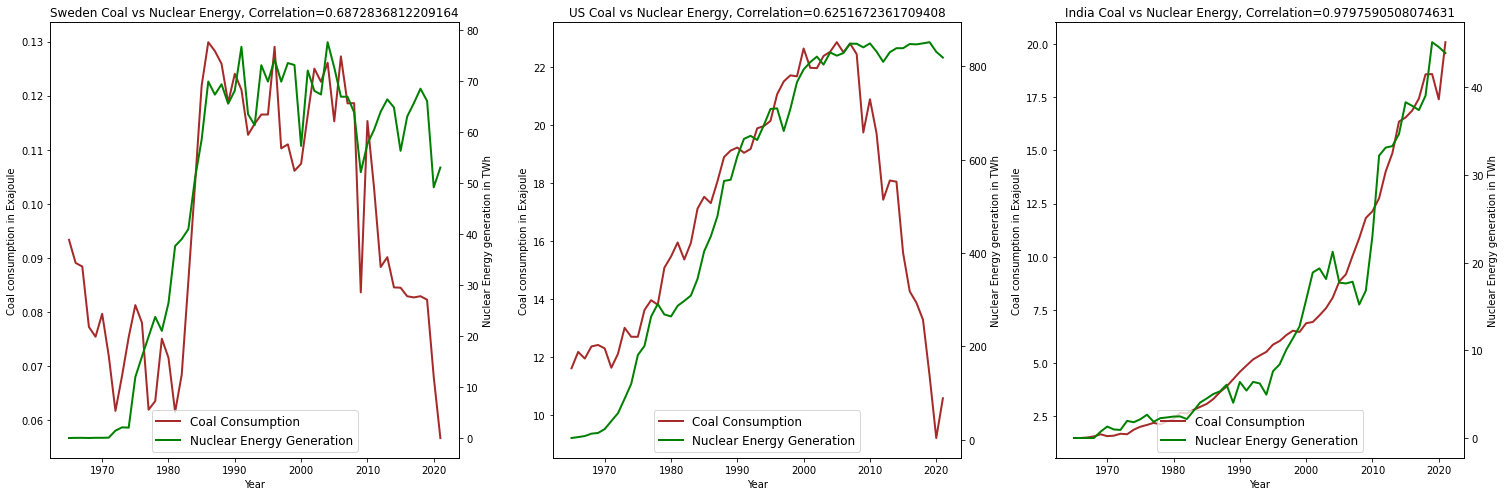

In [29]:
fig, axF2b = plt.subplots(1, 3, figsize=(21,7))
for i, cntry in enumerate(["Sweden", "US", "India"]):
    axF2b[i].plot(df_coal.loc[cntry]["Coal consumption - EJ"], linewidth=2, color="brown", label="Coal Consumption")
    axF3b=axF2b[i].twinx()
    axF3b.plot(df2.loc[cntry]["Nuclear Generation - TWh"], linewidth=2, color="green", label="Nuclear Energy Generation")
    axF2b[i].set_title(cntry+ " Coal vs Nuclear Energy, Correlation="+str(df_coal.loc[cntry].corrwith(df2.loc[cntry]["Nuclear Generation - TWh"])["Coal consumption - EJ"]))
    axF2b[i].set_xlabel("Year")
    axF2b[i].set_ylabel("Coal consumption in Exajoule")
    axF3b.set_ylabel("Nuclear Energy generation in TWh")
    axF2b[i].legend([axF2[i].get_lines()[0], axF3.get_lines()[0]], ["Coal Consumption", "Nuclear Energy Generation"], fontsize=12, loc="lower center")
    str(df_coal.loc[cntry].corrwith(df2.loc[cntry]["Nuclear Generation - TWh"])["Coal consumption - EJ"])
    plt.tight_layout()

Trying to find some correlation for GDP and life expectancy

<AxesSubplot:xlabel='NuclearPower per capita kWh/Person', ylabel='Life Expectancy'>

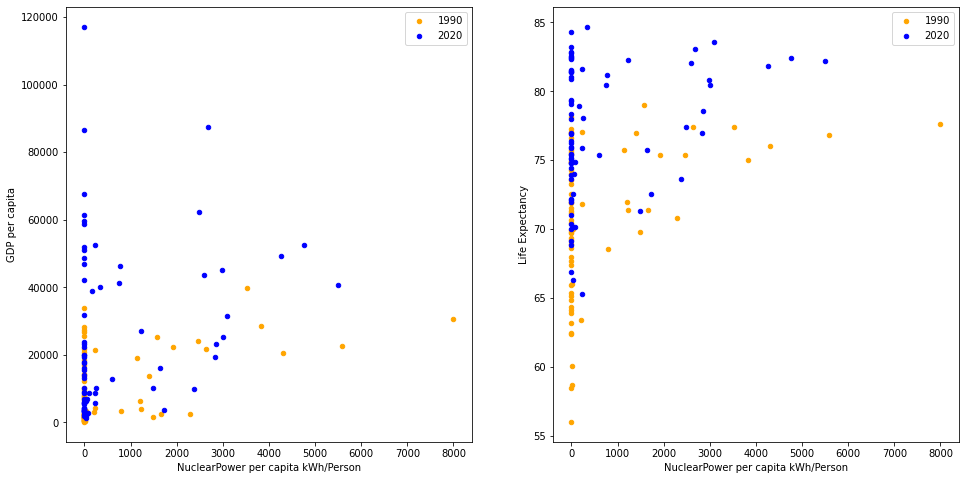

In [30]:
fig, axF4= plt.subplots(1,2)
df2.xs(1990, level="Year").plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF4[0], figsize=(16,8), color="orange", label="1990")
df2.xs(1990, level="Year").plot.scatter(x="NuclearPower per capita kWh/Person", y="Life Expectancy", ax=axF4[1], figsize=(16,8), color="orange", label="1990")
df2.xs(2020, level="Year").plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF4[0], figsize=(16,8), color="blue", label="2020")
df2.xs(2020, level="Year").plot.scatter(x="NuclearPower per capita kWh/Person", y="Life Expectancy", ax=axF4[1], figsize=(16,8), color="blue", label="2020")

Literature research: Usama Al-mulali: Investigating the impact of nuclear energy consumption on GDP
growth and CO2 emission: A panel data analysis, https://doi.org/10.1016/j.pnucene.2014.02.002

Statistic methods shown are beyond my knowledge, trying the direct approach

Time evolution of GDP and Life Expectancy:

<AxesSubplot:xlabel='GDP per capita', ylabel='Life Expectancy'>

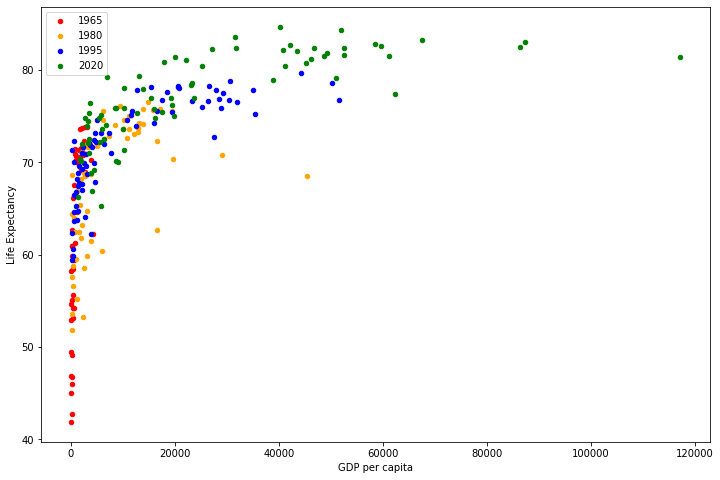

In [31]:
fig, axF5= plt.subplots()
df2.xs(1965, level="Year").plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF5, figsize=(12,8), color="red", label="1965")
df2.xs(1980, level="Year").plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF5, figsize=(12,8), color="orange", label="1980")
df2.xs(1995, level="Year").plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF5, figsize=(12,8), color="blue", label="1995")
df2.xs(2020, level="Year").plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF5, figsize=(12,8), color="green", label="2020")

Heatmaps were unsatisfying, Looking at scatterplots:

<AxesSubplot:xlabel='NuclearPower per capita kWh/Person', ylabel='GDP per capita'>

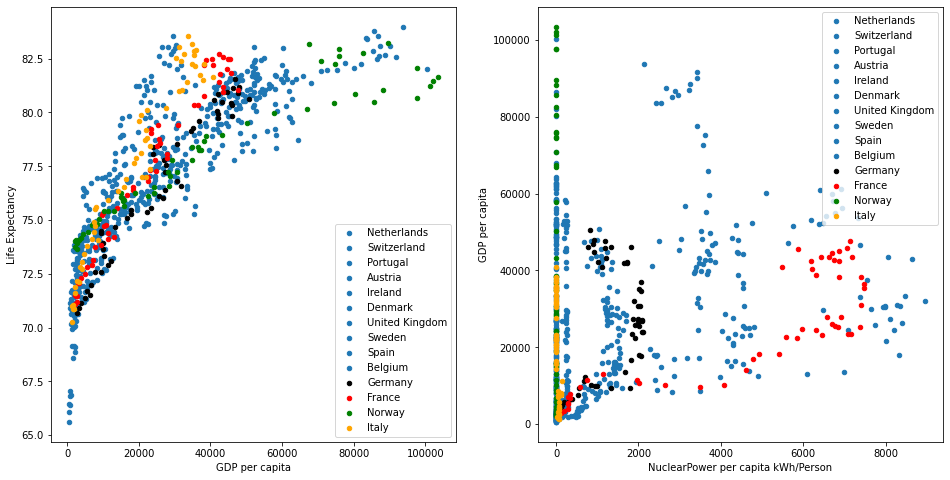

In [32]:
cntriesWest=[c for c in cntries if c in ["Austria", "Belgium", 
    "Denmark", "France", "Germany", "Ireland", "Italy", "Netherlands", 
    "Norway", "Portugal", "Spain", "Sweden", "Switzerland", "United Kingdom"]]

fig, axF6= plt.subplots(1, 2)
for c in cntriesWest:
    if c not in ["France", "Germany", "Norway", "Italy"]: 
        df2.loc[c].plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF6[0], figsize=(16,8), label=c)
df2.loc["Germany"].plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF6[0], color="k", figsize=(16,8), label="Germany")
df2.loc["France"].plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF6[0], color="red", figsize=(16,8), label="France")
df2.loc["Norway"].plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF6[0], color="green", figsize=(16,8), label="Norway")
df2.loc["Italy"].plot.scatter(x="GDP per capita", y="Life Expectancy", ax=axF6[0], color="orange", figsize=(16,8), label="Italy")

for c in cntriesWest:
    if c not in ["France", "Germany", "Norway", "Italy"]: 
        df2.loc[c].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF6[1], figsize=(16,8), label=c)
df2.loc["Germany"].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF6[1], color="k", figsize=(16,8), label="Germany")
df2.loc["France"].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF6[1], color="red", figsize=(16,8), label="France")
df2.loc["Norway"].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF6[1], color="green", figsize=(16,8), label="Norway")
df2.loc["Italy"].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDP per capita", ax=axF6[1], color="orange", figsize=(16,8), label="Italy")

Strong correlation between Life Expectancy and GDP per capita, but also effects on LE due to other factors (Italy - adriatic lifestyle?)

Correlation stronger between differences?
Nuclear energy vs difference (first order) of GDP per capita

<AxesSubplot:xlabel='NuclearPower per capita kWh/Person', ylabel='GDPpc diff'>

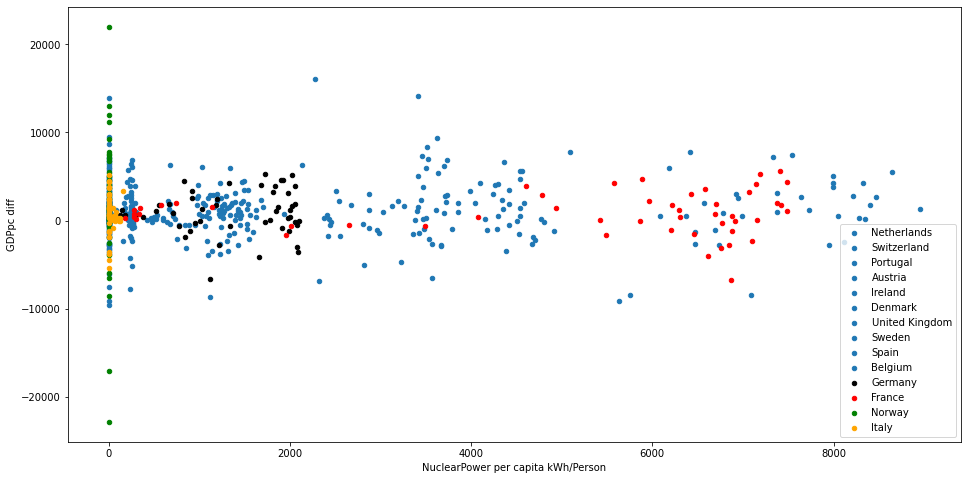

In [33]:
cntriesWest=[c for c in cntries if c in ["Austria", "Belgium", 
    "Denmark", "France", "Germany", "Ireland", "Italy", "Netherlands", 
    "Norway", "Portugal", "Spain", "Sweden", "Switzerland", "United Kingdom"]]

fig, axF7= plt.subplots()
for c in cntriesWest:
    if c not in ["France", "Germany", "Norway", "Italy"]: 
        df2.loc[c][2:].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDPpc diff", ax=axF7, figsize=(16,8), label=c)
df2.loc["Germany"][2:].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDPpc diff", ax=axF7, color="k", figsize=(16,8), label="Germany")
df2.loc["France"][2:].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDPpc diff", ax=axF7, color="red", figsize=(16,8), label="France")
df2.loc["Norway"][2:].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDPpc diff", ax=axF7, color="green", figsize=(16,8), label="Norway")
df2.loc["Italy"][2:].plot.scatter(x="NuclearPower per capita kWh/Person", y="GDPpc diff", ax=axF7, color="orange", figsize=(16,8), label="Italy")

In [34]:
for c in cntriesWest:
    if df2.loc[c]["Nuclear Generation - TWh"].mean()>0:
        print(c+" "+ str(df2.loc[c].corrwith(df2.loc[c]["Nuclear Generation - TWh"])["GDPpc diff"]))

France 0.2132868729995805
Netherlands 0.13553444107072768
Switzerland 0.3905933385183283
United Kingdom 0.28568948111870063
Italy -0.11034673472475874
Sweden 0.1323300760769987
Germany 0.27044937093290594
Spain 0.23590038230583152
Belgium 0.2668060458924207


Only small correlation but all (Italy is an exception as it had nuclear energy only for a short while) positive!

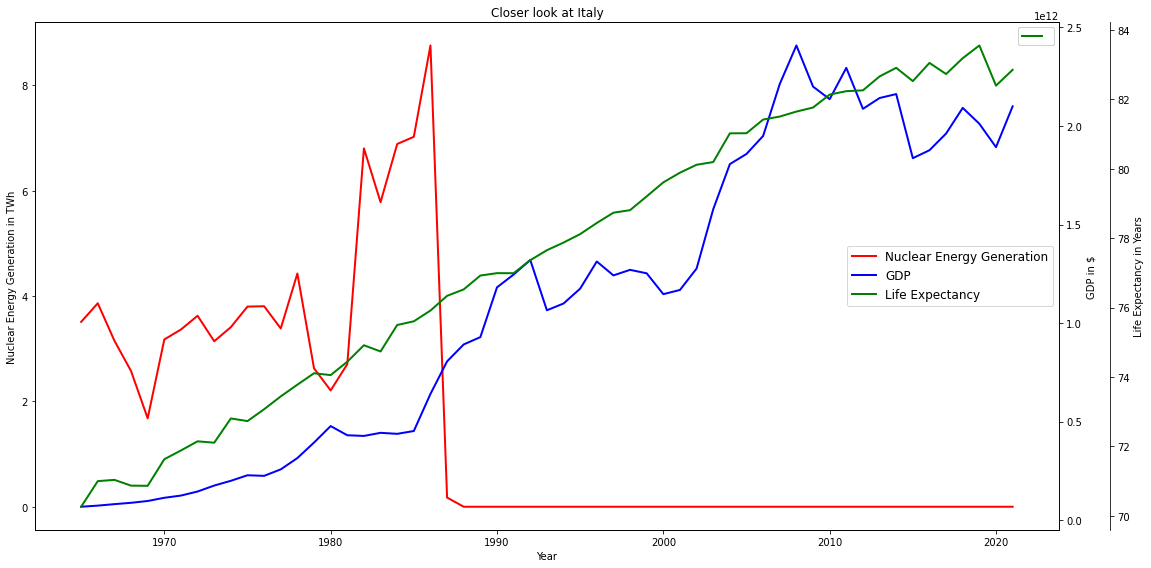

In [35]:
fig, axF8= plt.subplots()
axF9=axF8.twinx()
axF10=axF8.twinx()
axF8.set_title("Closer look at Italy")
axF8.set_ylabel("Nuclear Energy Generation in TWh")
axF9.set_ylabel("GDP in $")
axF10.set_ylabel("Life Expectancy in Years")
axF10.spines.right.set_position(("axes", 1.05))
df2.loc["Italy"].plot(y="Nuclear Generation - TWh", ax=axF8, color="red", linewidth=2, figsize=(16,8), label="")
df2.loc["Italy"].plot(y="GDP", ax=axF9, color="blue", linewidth=2, figsize=(16,8), label="")
df2.loc["Italy"].plot(y="Life Expectancy", ax=axF10, color="green", linewidth=2, figsize=(16,8), label="")
axF8.legend([axF8.get_lines()[0], axF9.get_lines()[0], axF10.get_lines()[0]], ["Nuclear Energy Generation", "GDP", "Life Expectancy"], fontsize=12, loc="center right")
plt.tight_layout()

Has Italy's short time with Nuclear Energy produced some notable differences? Again outside influences a lot stronger than any positive or negative effect due to the inherent charakteristics from Nuclear Energy